# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [1]:
# Your code here
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#load the dataset
df = pd.read_csv('otto_group.csv')
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [2]:
# Your code here
#explore the df
print("data info:", df.info())

#check for missing values
print(df.isna().sum().sort_values(ascending=False))

#check for duplicates
print("duplicated: ",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [3]:
"""
This means that all the columns are numerical and there are no missing values in the dataset.

"""

'\nThis means that all the columns are numerical and there are no missing values in the dataset.\n\n'

In [4]:
# Your code here
print(df.nunique().to_string())



id         61878
feat_1        42
feat_2        37
feat_3        48
feat_4        59
feat_5        15
feat_6         9
feat_7        30
feat_8        55
feat_9        40
feat_10       26
feat_11       28
feat_12       20
feat_13       51
feat_14       32
feat_15       37
feat_16       28
feat_17       40
feat_18       30
feat_19      105
feat_20       27
feat_21       15
feat_22       21
feat_23       24
feat_24       66
feat_25       28
feat_26       31
feat_27       55
feat_28       21
feat_29       50
feat_30       51
feat_31       29
feat_32       40
feat_33       20
feat_34       49
feat_35       78
feat_36       58
feat_37       18
feat_38       36
feat_39       77
feat_40       41
feat_41       31
feat_42       39
feat_43       28
feat_44       26
feat_45       76
feat_46       39
feat_47       39
feat_48       47
feat_49       35
feat_50       56
feat_51       22
feat_52       36
feat_53       42
feat_54       53
feat_55       26
feat_56       54
feat_57       27
feat_58       

In [5]:
# Your code here
#code to return columns categorical in nature
cat_cols = df.select_dtypes('object').columns
print(cat_cols)


Index(['target'], dtype='object')


In [6]:
# Your code here
"""
There are no categorical columns in the dataset apart from the target column.
"""

'\nThere are no categorical columns in the dataset apart from the target column.\n'

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'feat_1'}>,
        <Axes: title={'center': 'feat_2'}>,
        <Axes: title={'center': 'feat_3'}>,
        <Axes: title={'center': 'feat_4'}>,
        <Axes: title={'center': 'feat_5'}>,
        <Axes: title={'center': 'feat_6'}>,
        <Axes: title={'center': 'feat_7'}>,
        <Axes: title={'center': 'feat_8'}>,
        <Axes: title={'center': 'feat_9'}>],
       [<Axes: title={'center': 'feat_10'}>,
        <Axes: title={'center': 'feat_11'}>,
        <Axes: title={'center': 'feat_12'}>,
        <Axes: title={'center': 'feat_13'}>,
        <Axes: title={'center': 'feat_14'}>,
        <Axes: title={'center': 'feat_15'}>,
        <Axes: title={'center': 'feat_16'}>,
        <Axes: title={'center': 'feat_17'}>,
        <Axes: title={'center': 'feat_18'}>,
        <Axes: title={'center': 'feat_19'}>],
       [<Axes: title={'center': 'feat_20'}>,
        <Axes: title={'center': 'feat_21'}>,
        <Axes: title={

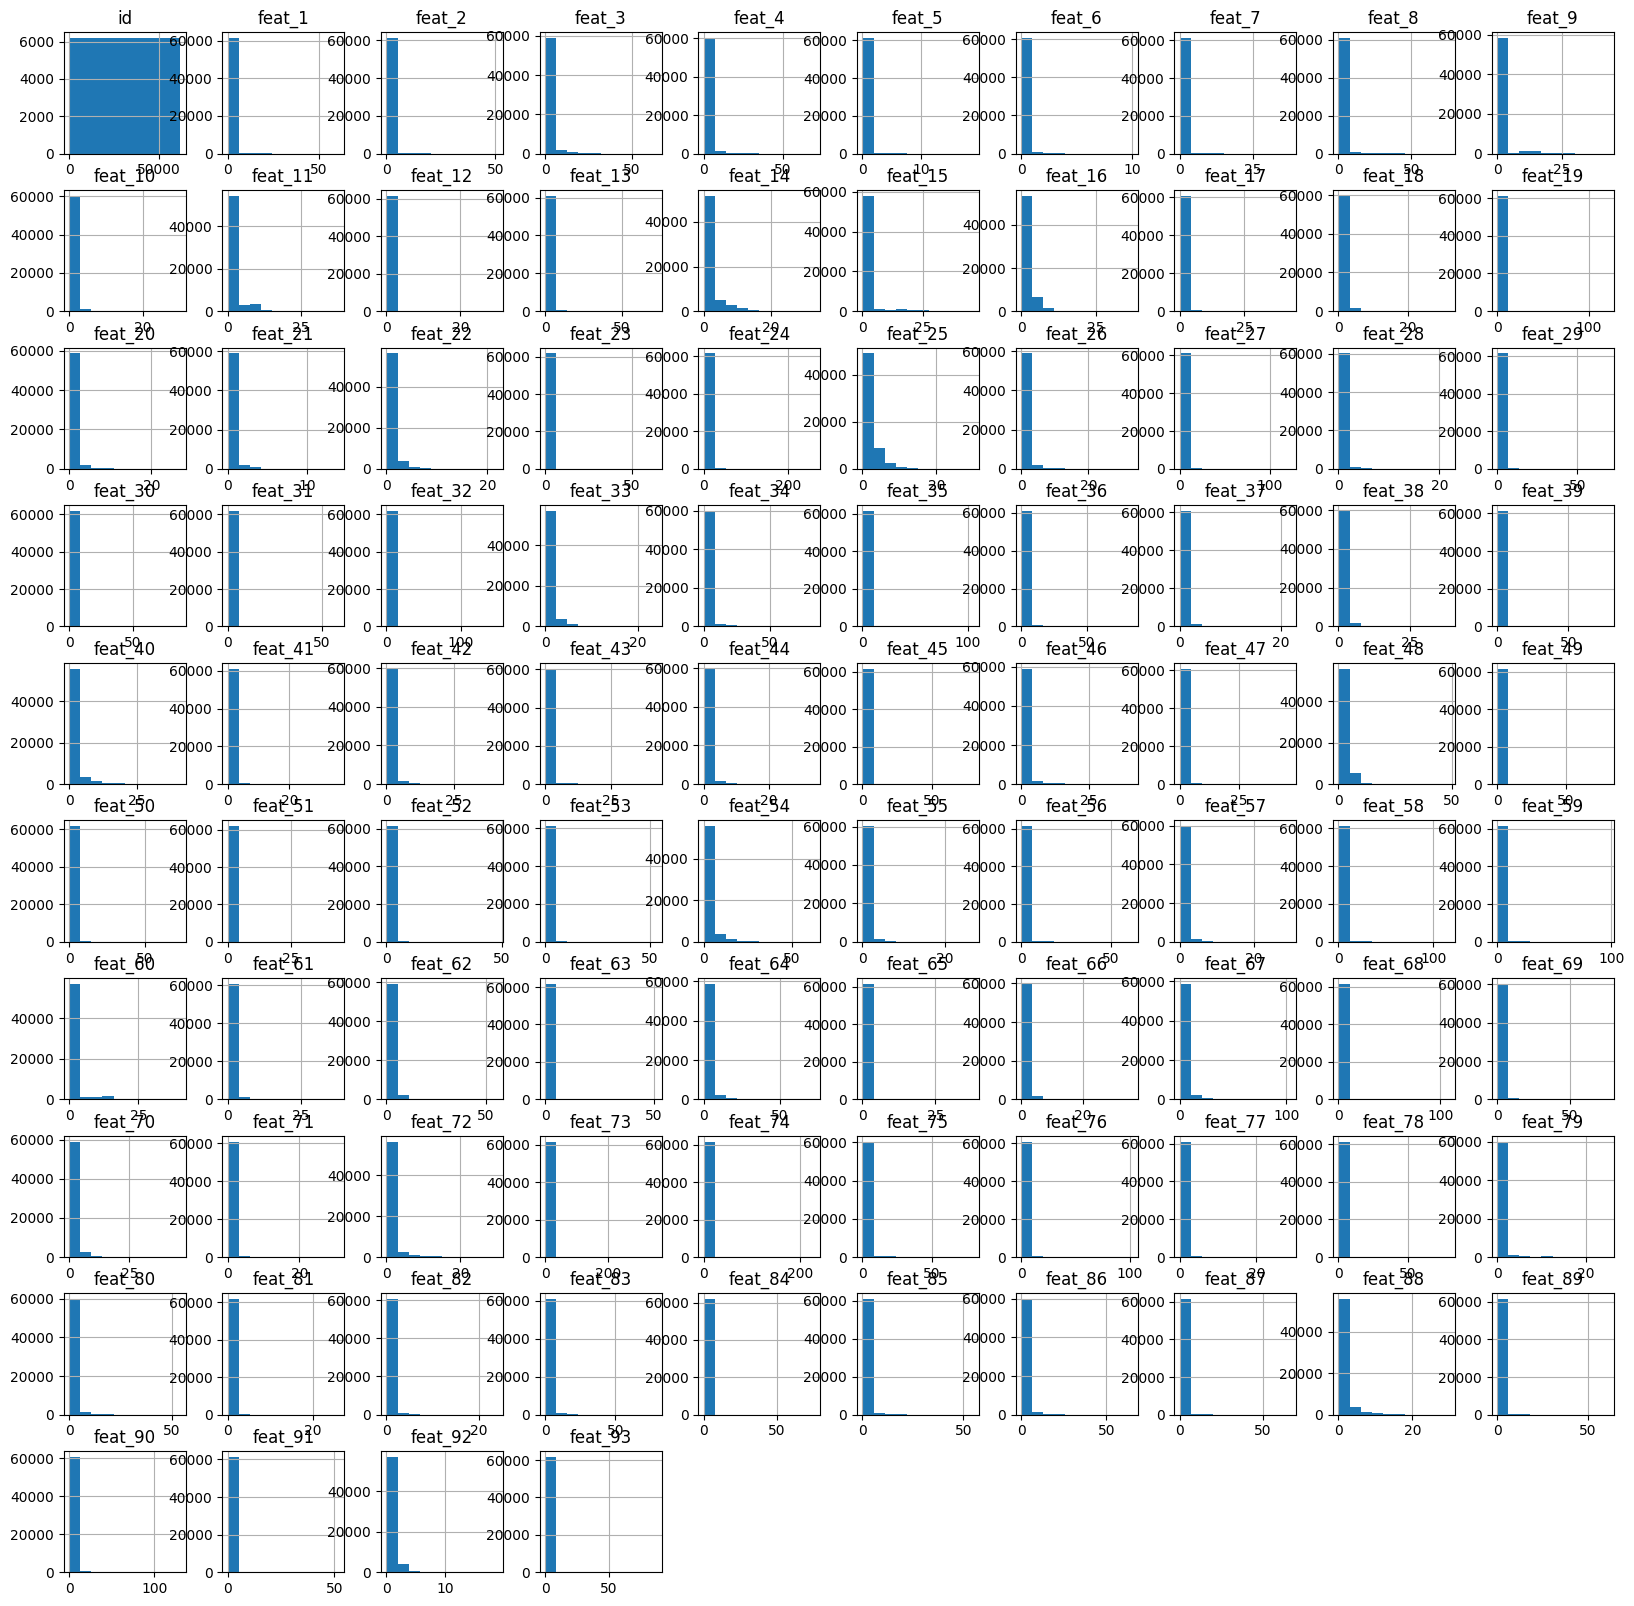

In [7]:
# Your code here
#plot the different columns to see the distribution
df.hist(figsize=(20,20))

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

<Axes: xlabel='target'>

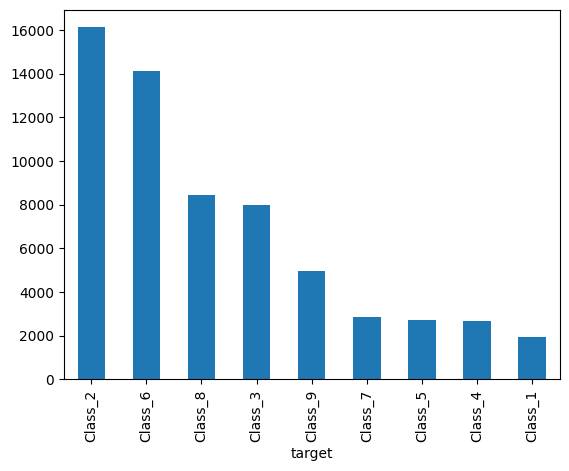

In [8]:
#view the target column 
df['target'].value_counts().plot(kind='bar')

<Axes: xlabel='target'>

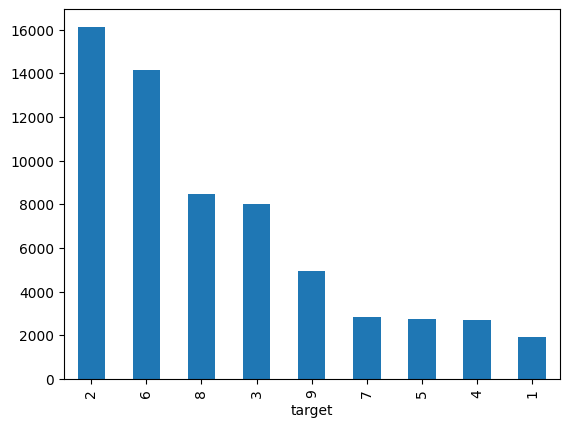

In [9]:
#rename the different target classes to numbers 
#create a dataframe to apply the renaming
df_to_rename ={
    'Class_1':1,
    'Class_2':2,
    'Class_3':3,
    'Class_4':4,
    'Class_5':5,
    'Class_6':6,
    'Class_7':7,
    'Class_8':8,
    'Class_9':9
    }

#apply the df
df['target'] = df['target'].map(df_to_rename)
df['target'].value_counts().plot(kind='bar')

<Axes: >

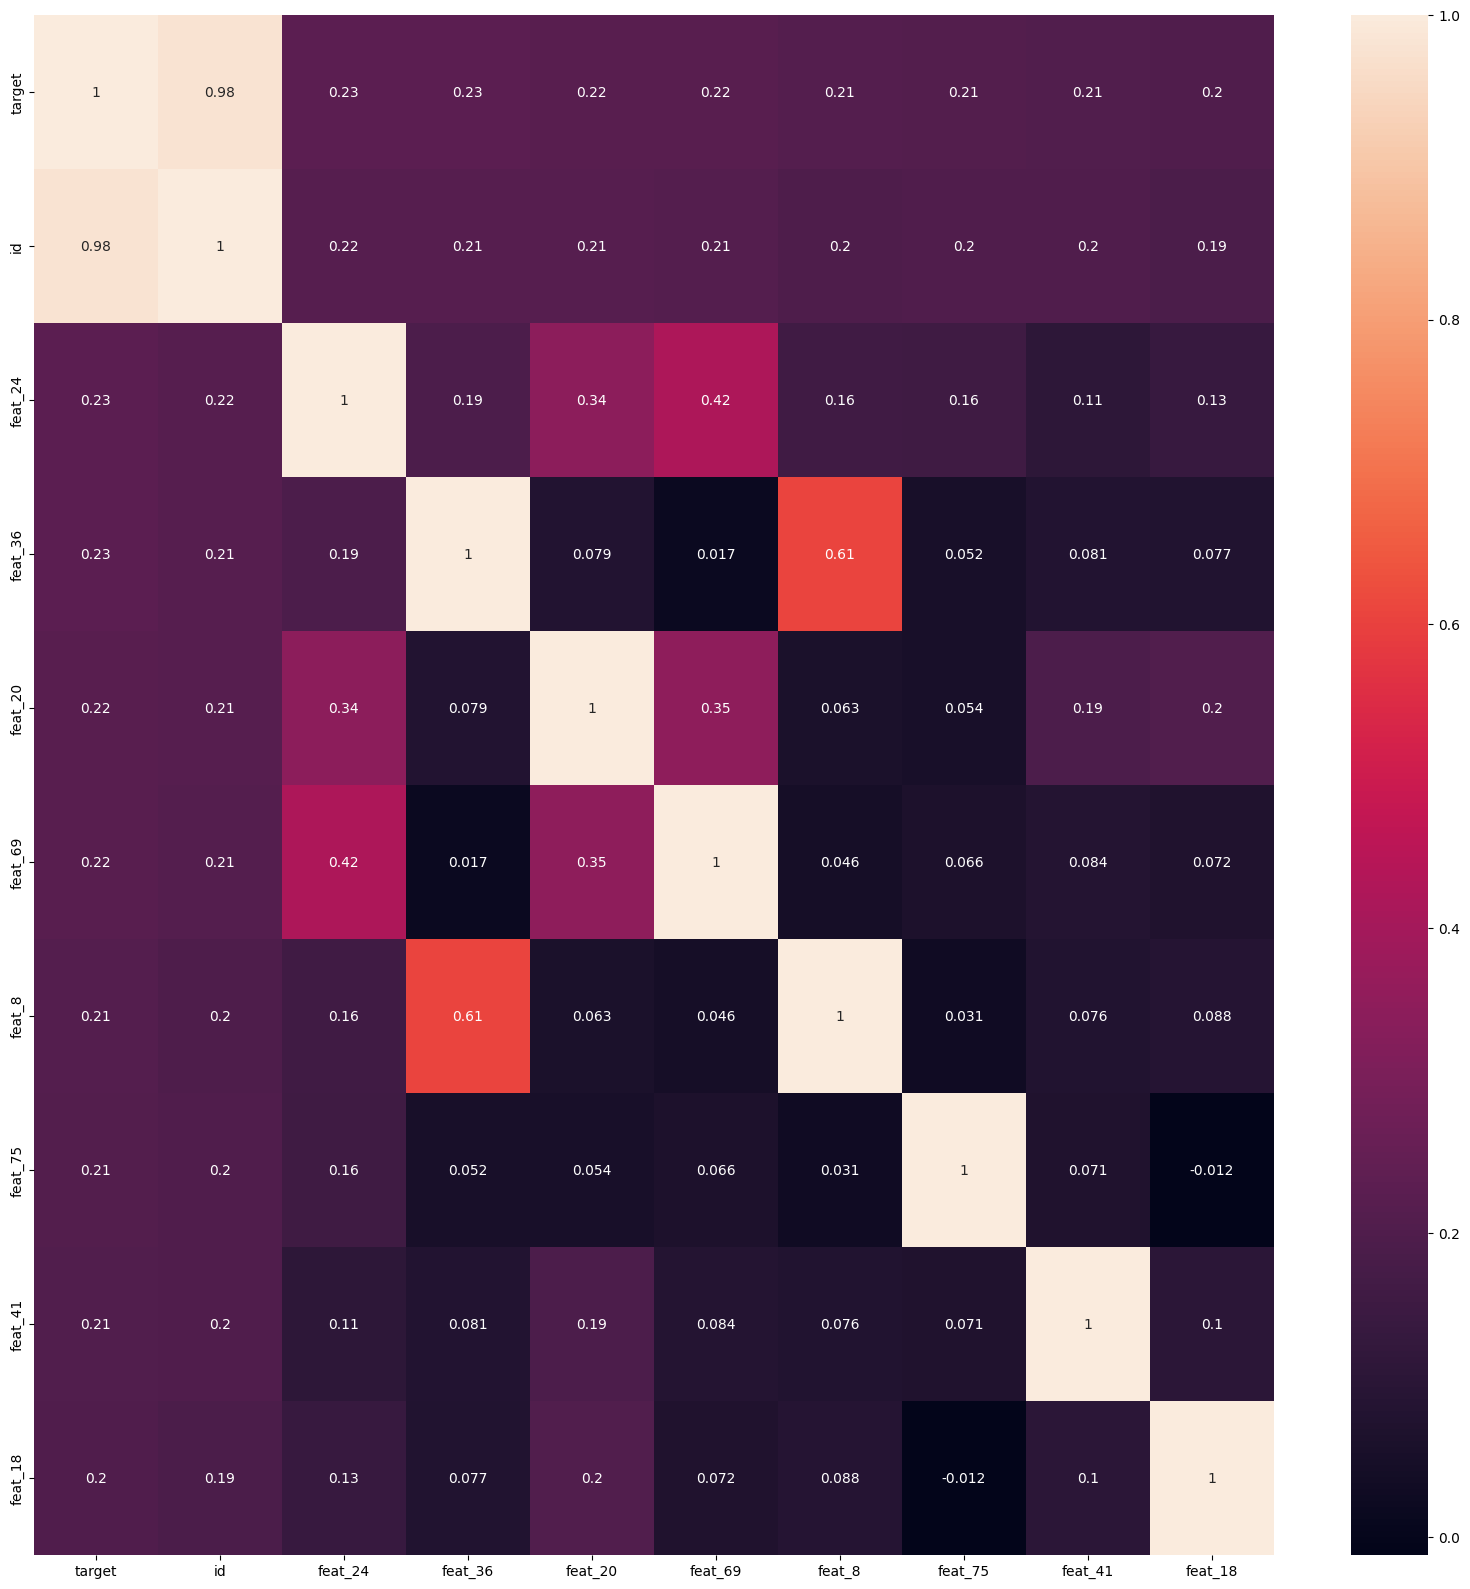

In [10]:
# Your code here
#plot the correlation matrix
plt.figure(figsize=(20,20))
#plot heatmap of top 10 correlated features with the target
related = df.corr()['target'].sort_values(ascending=False).head(10)
#plot the heatmap
sns.heatmap(df[related.index].corr(),annot=True)

In [11]:
"""
The heatmap shows that the features are not correlated with each other

"""

'\nThe heatmap shows that the features are not correlated with each other\n\n'

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

<Axes: >

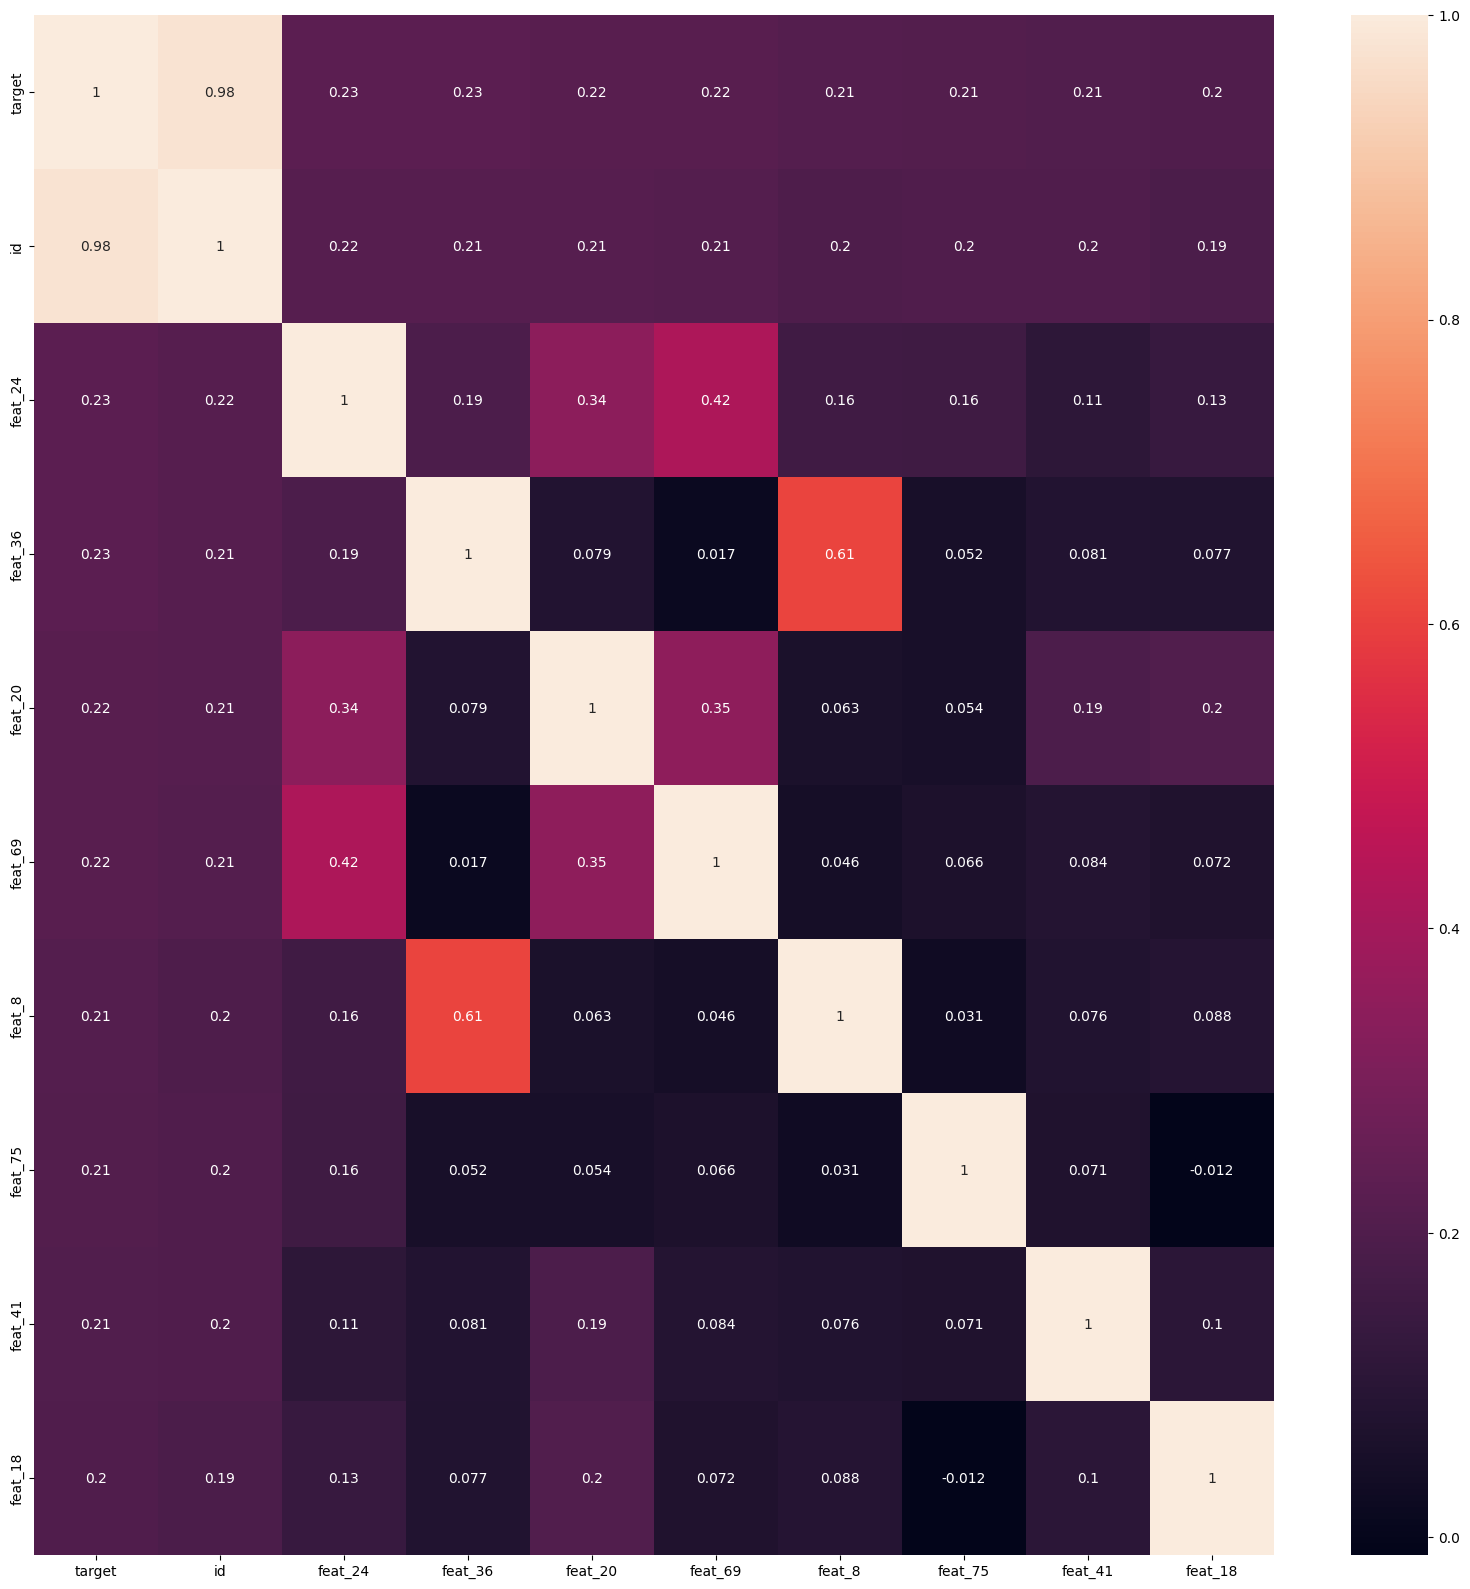

In [12]:
# Your code here
#plot the correlation matrix
plt.figure(figsize=(20,20))
#plot heatmap of top 10 correlated features with the target
related = df.corr()['target'].sort_values(ascending=False).head(10)
#plot the heatmap
sns.heatmap(df[related.index].corr(),annot=True)


In [13]:
"""
From the above it is clear that the features have a weak positive correlation with the target variable.
"""

'\nFrom the above it is clear that the features have a weak positive correlation with the target variable.\n'

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [14]:
# Your code here
#define x and y 
y = df['target']
X = df.drop('target',axis=1)


#split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

#standardize the data
scaler = StandardScaler()
#fit the scaler
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)


In [15]:
# Your code here
#use PCA to reduce the dimensionality of the dataset
#instatiate the PCA model
pca = PCA(n_components= 0.80) #want the data to explain 80% of the variance. To reduce the number of components based on collinearity
#fit the model
X_transformed = pca.fit_transform(Xtrain_scaled)

#pca components
print(pca.n_components_)
#get the explained variance
explained_variance = pca.explained_variance_ratio_
#get the combined variance of the components
cumulative_variance = np.cumsum(explained_variance)  #cumsum gives the cumulative sum of the elements along a given axis
print(cumulative_variance)
#get the features
print(pca.get_feature_names_out()) #get the feature names of the transformed data

print(pca.get_params())

49
[0.0864838  0.15203689 0.1943062  0.22655933 0.25474366 0.28082468
 0.30472506 0.32831445 0.35105398 0.37151939 0.39040316 0.40896185
 0.42729446 0.4444283  0.46066912 0.47632009 0.49089327 0.5050854
 0.51886167 0.53185293 0.54440468 0.55654559 0.56861325 0.57995438
 0.59098256 0.60178011 0.6121841  0.62245589 0.6325455  0.64253486
 0.65246274 0.66224856 0.67192165 0.68121963 0.69026207 0.69920107
 0.70810278 0.71674234 0.72519283 0.733474   0.74161414 0.74970671
 0.75753601 0.76513335 0.77266781 0.7800996  0.78737449 0.79438743
 0.80135724]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43' 'pca44' 'pca45'
 'pca46' 'pca47' 'pca48']
{'copy': True, 'iterated_power': 'auto', 'n_components': 0.8

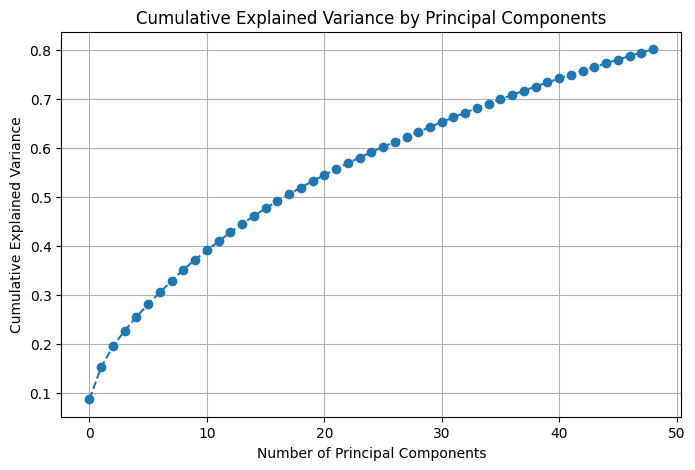

In [16]:
#plot the pca components
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o',linestyle='--')#marker is the 
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [17]:
# Your code here
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=42)


In [18]:
# Your code here

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [19]:
# Your code here
#standardize the data
scaler = StandardScaler()
#fit the scaler
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

#use PCA to reduce the dimensionality of the dataset
pca = PCA(n_components= 0.80)
#fit the model
X_transformed = pca.fit_transform(Xtrain_scaled)
X_test_transformed = pca.transform(Xtest_scaled)



In [20]:
# Your code here
#build logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#initialize the log model 
log_model = LogisticRegression(random_state=42)

# get param needed for logistic regression 
#define the param dict
param_grid ={
    'penalty':['l2'],
    'solver':['liblinear'],
    'C':['None',1.0], #inverse of regularization 
}

#apply the gridsearch cv
grid_search = GridSearchCV(log_model, param_grid=param_grid, cv=5, scoring='accuracy')

#fit the grid_search 
grid_search.fit(X_transformed, y_train)



c:\Users\ADMIN\anaconda3\envs\chika\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\anaconda3\envs\chika\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\anaconda3\envs\chika\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ADMIN\anaconda3\envs\chika\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': ['None', 1.0], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [21]:
# Your code here
#check for the best parameters
grid_search.best_params_


{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [22]:
#initialize the log model again with the now parameters
log_model = LogisticRegression(C=1.0,penalty='l2',solver='liblinear',random_state=42)

#fit the model 
log_model.fit(X_transformed,y_train)

#get the y pred 
y_pred = log_model.predict(X_test_transformed)

#get the accuracy score
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.7922592113768584


## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [23]:
# Your code here
# ⏰ This cell may take several minutes to run
#create 3 different pipelines
#import the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



#initialize the svm pipeline
svm_pipeline = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('pca',PCA(n_components=0.80)),
        ('svm',SVC(kernel='linear',random_state=42))
    ]
)

#initialize the decision tree pipeline
dt_pipeline = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('pca',PCA(n_components=0.80)),
        ('dt',DecisionTreeClassifier(random_state=42))
    ]
)

#initialize the random forest pipeline
rf_pipeline = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('pca',PCA(n_components=0.80)),
        ('rf',RandomForestClassifier(random_state=42))
    ]
)

#train and evaluate each pipeline separately
svm_pipeline.fit(X_transformed, y_train)
#get predictions
y_pred = svm_pipeline.predict(X_test_transformed)
#get accuracy score
print("SVM Accuracy:",accuracy_score(y_test,y_pred))

#decision tree 
dt_pipeline.fit(X_transformed, y_train)
#get predictions
y_pred = dt_pipeline.predict(X_test_transformed)
#get accuracy score
print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred))


#random forest 
rf_pipeline.fit(X_transformed, y_train)
#get predictions
y_pred = rf_pipeline.predict(X_test_transformed)
#get accuracy score
print("Random Forest  Accuracy:",accuracy_score(y_test,y_pred))


SVM Accuracy: 0.7898351648351648
Decision Tree Accuracy: 0.6611990950226244
Random Forest  Accuracy: 0.8048642533936652


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [29]:
# Your code here 
# imports
from sklearn.ensemble import AdaBoostClassifier
#initialize the pipeline
rf_pipeline2 = Pipeline(
    [
    #one for random forest with  at least 40 different models
    ('rf',RandomForestClassifier(random_state=42))
        

    ]
)





In [31]:
# Your code here
# ⏰ This cell may take a long time to run!
#define the param grid
rf_param_grid = {
            'rf__n_estimators':[40,60],
            'rf__max_depth':[5,10],# maximum depth of the tree either 5,10,15 or 20 nodes
            'rf__min_samples_split':[2,5], # minimum number of samples required to split an internal node

            }
#grid search 
rf_grid_search=  GridSearchCV(rf_pipeline2, param_grid= rf_param_grid, cv=5, scoring='accuracy')
#fit the grid search 

rf_grid_search.fit(X_transformed, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [5, 10],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [40, 60]},
             scoring='accuracy')

Use your grid search object along with `.cv_results` to get the full result overview

In [33]:
# Your code here 
# Best hyperparameters
print("Random Forest Best Params:", rf_grid_search.best_params_)

# Cross-validation results
print("Cross-validation Results:", rf_grid_search.cv_results_)


Random Forest Best Params: {'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 60}
Cross-validation Results: {'mean_fit_time': array([ 6.98358169, 10.47106767,  6.86265392,  9.88568335, 11.51927848,
       17.48049612, 14.66025743, 20.7737134 ]), 'std_fit_time': array([0.43184259, 0.19951385, 0.14793838, 0.27447893, 0.89326704,
       0.8095859 , 3.18637914, 4.40770122]), 'mean_score_time': array([0.03378463, 0.04863777, 0.03122268, 0.03955054, 0.04675279,
       0.06935158, 0.04943967, 0.088063  ]), 'std_score_time': array([0.00884414, 0.01156428, 0.0036179 , 0.00643646, 0.00486219,
       0.00921107, 0.00858432, 0.02896849]), 'param_rf__max_depth': masked_array(data=[5, 5, 5, 5, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'param_rf__min_samples_split': masked_array(data=[2, 2, 5, 5, 2, 2, 5, 5],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999

### AdaBoost

In [35]:
# Your code here
# ⏰ This cell may take several minutes to run
#pipeline for ada boost- for boosting 
ada_pipeline = Pipeline(
    [
        ('ada',AdaBoostClassifier())
    
    ]
)

#define the grid parameters 
ada_param_grid = {
        
            'ada__n_estimators':[40,60], # number of models to iteratively train
            'ada__learning_rate':[0.1,0.5],# weight applied to each classifier at each boosting iteration
            'ada__algorithm':['SAMME', 'SAMME.R'] #algorithm to use in the boosting process

            }
ada_grid_search = GridSearchCV(ada_pipeline, param_grid= ada_param_grid, cv=5, scoring='accuracy')

#fit the grid search
ada_grid_search.fit(X_transformed, y_train)

Use your grid search object along with `.cv_results` to get the full result overview: 

In [27]:
# Your code here 
print("Ada Boost Best Params:",ada_grid_search.best_params_)

# Cross-validation results
print("Cross validation results:",ada_grid_search.cv_results_)


### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [28]:
# Your code here
# ⏰ This cell may take a very long time to run!

svm_pipeline2 = Pipeline(
    [
        ('svm',SVC())
    ]
)

#define the param grid
svm_param_grid = {
            'svm__C':[0.1,1,10,100],
            'svm__kernel':['linear','rbf','poly','sigmoid'],
            'svm__degree':[2,3,4], #degree of the polynomial kernel function

            }

#grid search
svm_grid_search = GridSearchCV(svm_pipeline2, param_grid= svm_param_grid, cv=5, scoring='accuracy')

#fit the grid search
svm_grid_search.fit(X_transformed, y_train)


Use your grid search object along with `.cv_results` to get the full result overview: 

In [29]:
# Your code here 
print("SVM Best Params:",svm_grid_search.best_params_.cv_results_)


## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?